In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target
print(np.unique(y))

[0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 1, stratify = y )
#bincount
print("Labels counts in y: ",np.bincount(y))
print("Labels counts in y_train: ", np.bincount(y_train))
print("Labels counts in y_test: ", np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
#train perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
miss_classified = (y_pred != y_test).sum()
print("MissClassified: ",miss_classified)


MissClassified:  3


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy : % .2f' % accuracy_score(y_pred, y_test))

Accuracy :  0.93


In [7]:
print("Accuracy Score : % .2f" % ppn.score(X_test_std,y_test))

Accuracy Score :  0.93


In [8]:
#画超平面

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

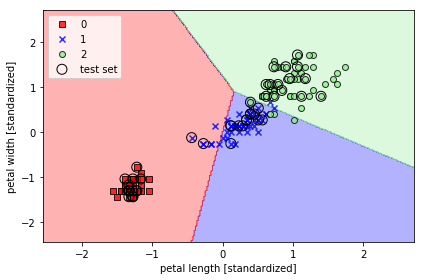

In [9]:
#htack vstack 水平叠加和垂直叠加
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, 
                      y = y_combined, 
                      classifier = ppn, 
                      test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

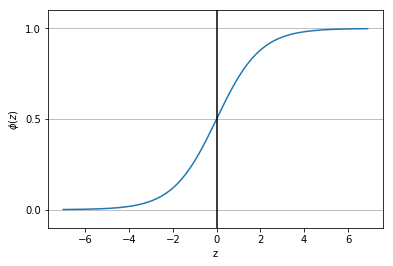

In [10]:
#sigmoid函数
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0,color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() #Get Current Axes
ax.yaxis.grid(True)

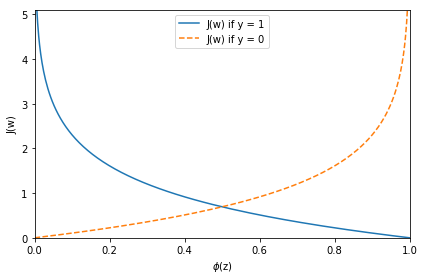

In [11]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z] 
plt.plot(phi_z, c1, label = 'J(w) if y = 1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle = '--', label = 'J(w) if y = 0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()



In [12]:
#将adaline函数改为逻辑回归函数
class LogisticRegressionGD(object):
    """
    ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float #学习率
      Learning rate (between 0.0 and 1.0)
    n_iter : int  #迭代次数
      Passes over the training dataset.
    random_state : int  #随机数生成器参数
      Random number generator seed for random weight initialization.


    Attributes
    -----------
    w_ : 1d-array #权重
      Weights after fitting.
    cost_ : list #平方误差
      Sum-of-squares cost function value in each epoch.

    """
    # 参数初始化
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    # 拟合数据 进行权值更新 计算错误率
    
   
    def fit(self,X,y):
        '''
         """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
          
        X：要进行拟合的输入数据集，有n_sample个样本，每个样本有n_feature个特征值
        例如 X = （[1,2,3],[4,5,6]） [1,2,3]为类别+1，[4,5,6]为类别-1
        
        y : array-like, shape = [n_samples]
          Target values.
        y:输出数据分类，{+1，-1}
        
        Returns
        -------
        self : object

        """
        '''
        rgen = np.random.RandomState(self.random_state)
        #将偏置b并入到w矩阵，所以大小为X行数加1       X.shape[1]代表行数，即样本个数
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            #在这个代码中activation函数可以不用，写上它只是为了代码的通用性，
            #比如logistic代码中可以更改为sigmod函数
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            #更新原理见博客 https://mp.csdn.net/postedit/79668201
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            #代价函数改为逻辑回归的对数似然函数
            cost = - y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            #平方误差的总和 Sum of Squred Errors
            self.cost_.append(cost)
        return self
        
        # 净输入  X点乘W
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
        
        #在本代码中 activation没有意义  是为了以后logistic中可以用到
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
        
        #预测函数
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0 )
            

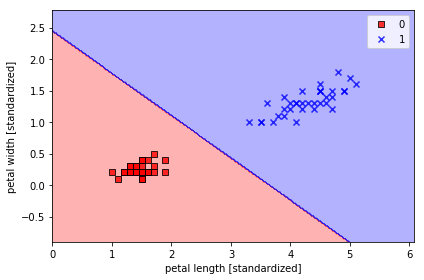

In [13]:
#logistic regression 只能用来进行二项分类
X_train_01_subset = X_train[(y_train == 0 )| (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1 )

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset, 
                      y = y_train_01_subset, 
                      classifier = lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
    
    
    
    
    

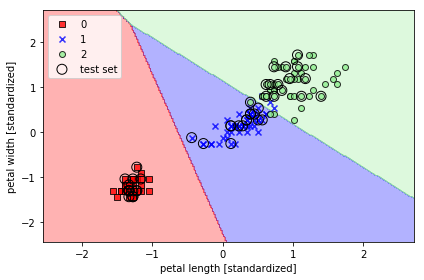

In [18]:
#sklearn实现逻辑回归 logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, 
                     y = y_combined, 
                     classifier = lr, 
                     test_idx = range(105,150) )
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [19]:
lr.predict_proba(X_test_std[:3,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [25]:
#argmax(axis = 1 / 0 )——> axis = 0为列向，axis = 1 为横向
lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([2, 1, 0], dtype=int64)

In [26]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [31]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])